<a href="https://colab.research.google.com/github/ikyath/RNN_Introduction_Fundamentals/blob/master/RNN_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series


A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data











Example - Weather

Weather is a dynamical System

  See : Chaos Theory,Butterfly effect

![alt text](https://i.ytimg.com/vi/D6jln7pqn70/maxresdefault.jpg)

This is that even if we have the exact deterministic equations to describe a weather system our forecast will still become more and more incorrect.

The further into the future we try to predict that's pretty counterintuitive because you would think if you have the exact equation for something then you should be able to calculate all the future values precisely but due to the butterfly effect this is not actually true.

As the saying goes a butterfly flapping its wings in Tokyo can cause a tornado in America.

Small and decisions like numerical round off error and your computer will ultimately lead it to your weather forecast being completely wrong eventually.This is actually really relevant to us because when you think of time series and our own ends you automatically

![alt text](https://media.graytvinc.com/images/810*455/lnk+wx1.jpg)






















Another type of Sequential data is Text but in machine learning we don't consider it as sequence

Forecasting is about to predict the next values in a timeseries

# Sequence Data


Study of machine learning algorithms designed for sequential data is known as sequence learning

In a neural network, you have one output per input. You have an image and you have a label, for instance. There is no way you can input image after image on Neural Networks and get an output based on all of them. The nature of neural networks make them unable to process sequential data.

So, in a feed forward neural network, output at a time t is independent of the output at time (t-1).

On the other hand, RNNs work very well with sequential data. They have a mechanism of “remembering” the previous inputs and producing an output based on all of the inputs. This makes them well-suited for sequential type of data such as text, audio, video or any time-series data.

![alt text](https://media1.giphy.com/media/119h7q3m9c5Tfa/source.gif)



*  The brain consists of billion of neurons, without any single duration.
*  A Decision made now is not only based only on what you hear/see now.
*  We can think and reason based on past inputs.
*  What happens if we add feedback loops and memory to neural network.









Traditional neural networks can’t do this, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous events in the film to inform later ones.

#**RNNs**

RNN is a type of artificial neural network that is designed to recognize patterns in sequential data such as text, genomes, numerical time series data resulting from sensors, stock markets etc

## **Basic Architecture of RNN**



![alt text](https://pydeeplearning.weebly.com/uploads/9/8/4/2/98422174/rnn_orig.png)







Let us discuss the maths behind this structure in detail 

![alt text](https://i.stack.imgur.com/aJL7l.png)

The above image show a RNN being unfolded to a full network, Xt is input to the network at time t, ht is the hidden state at time t also referred to as the memory of the network. It is calculated based on previous hidden state and current input.

Represented by ht= f (U*Xt +W*ht-1 +bh)

Here U and W are weights for input and previous state value input, bh is the bias associated to the hidden network And f is the non-linearity applied to the sum to generate final cell state.

And ouput at time t is calculated as shown below 
Ot = f (W*ht + bo)
b0 is the bias for the output layer

**Training an RNN**

To train a Recurrent Neural Network , we use back propagation as in any feed forward neural network. But as the back propagation happens for every time stamp, it is commonly referred to as Back propagation through time (BTT).

Lets discuss the issues faced during back propagation- 

Training a neural network implies we need to update the weights associated to the layers.The weights are updated as follows
Wnew = Wold + (n*dL/dW)

Wnew - new value of weight, Wold - old value, n - learning rate
L- Loss or the error in prediction, defined as (Actual o/p - Predicted o/p)^2
dL/dW - is the gradient of the loss with respect to the weight we want to update.

When this dL/dW is too small << << 1 -> change in W is too small , so there is no much change in the value of weights, this is called as the 
**Vanishing Gradient Problem**

For example, if we want to predict the next word in a sentence and the sentence is too long, which would require us to go back by many steps to understand the context. This would lead to the dL/dW to become small and this is also referred to  as **long term dependencies** 

On the contrary, the gradient dL/dW can become too large , which leads to huge changes in the weights and this leads to the Exploding Gradient Problem
**Exploding Gradient Problem**





## **Vanishing Gradient Problem**

As we know, the gradient descent algorithm finds the global minimum of the cost function that is going to be an optimal setup for a network

In RNNs

*  Information travels through time, which means that information from previous timepoint is feed as input to the next timepoint.
*   We can calculate the error, at each point.

Lets look into error which is calcualted after forward pass,

In the backpropagation process, we adjust our weight matrices with the use of a gradient. In the process, gradients are calculated by continuous multiplications of derivatives. The value of these derivatives may be so small, that these continuous multiplications may cause the gradient to practically “vanish”.



RNNs suffer from the problem of vanishing gradients, which hampers learning of long data sequences

FOr instance we have a sentence like 
' I went to France, - - - -. And now I speak _? ' 

So in this particular sentence, after *France*, there are say 4-5 words and then the sentence , *I speak* and we need to predict the next word. In order to do that , we need to go way back in the sentence to understand the context and then predict the word as, which in this case is *'French'* . 

This is commomly referred to as the 'Long term dependency'



# **LSTMs**

LSTMs are special kind of RNNs, designed explicitly to overcome the long term dependency problem. The repeating modules of neural networks in LSTM have a complex structure compared to that of RNN.
The repeating module in LSTM has four interacting layers
Memory cell

*   Memory cell
*   Forget gate
*   Input 
*   Output






![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)

Now lets look familiarize with the notations 
![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM2-notation.png)



*   Memory/Cell-state - This is represented as the horizontal layer running through the top of the diagram. It has some linear transformations as pointwise multiplication and addition
*   Gates - These are used to optionally let information through using sigmoid neural network layers, which outputs in either 0 or 1, representing the information which we want to leave or the information we want to persist.



## **Walk-through of LSTM**

Let us consider an example of text prediction, where we are trying to predict the next word based on the previous words to understand the working of LSTM metwork.

Firstly, we need to decide what information we want to remember and what to forget. This is decided using a sigmoid layer called the 'forget gate' layer. Here the output of sigmod activation function as we know is between 0 and 1 for each number in the cell state C(t-1), taking as inputs  h(t-1), the output from the previous layer and the x(t), the current input of the layer.
A '0' indicates that we can forget about that information and discard it and '1' indicates that we need to remember it.



![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png)

Let us understand it by going to back to our language model. Suppose, we are talking about a subject's gender, but we have the next input as a new subject, we would want to ignore that information about the gender of the previous subject. This is achieved using the forget gate as discussed above.

The next step is to decide what new information we are going to add to the cell state.

This is done in 2 steps.
First the sigmoid layer or the input gate layer is used to decide what values we want to update and then the tanh layer results in a vector of new values that can be added. So the state gets updated with the new values.


![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png)


So in our example, we want to add the information about the gender of the new subject which replaces the old value, that we want to forget.The cell state gets updated.

Finally we want the output. In this case, the sigmoid layer decides what parts of the cell state we want to ouput. The cell state C(t) is also passes through tanh which outputs values between -1 and +1. This is multiplied by the output of the sigmoid layer and results in the required parts.

![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png)

Ct-1 - is the old cell state we are updating to new state Ct by multiplying with the function ft, then we add the new value i*Ct 


So in our language example, as the network has seen the subject, it might want to output something relevant to what comes next. Say, if a verb is followed next, the network might output  if the subject is singular or plural, so that we will know what form of verb to be added.


![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png)


There are many variants of LSTM, 
- One introduced by Gers & Schmidhuber (2000), is adding “peephole connections.”, which means that the gate layers can take a look at the cell state.
- Another variation is to use coupled forget and input gates
- Another important variant is the Gated Recurrent Unit, which we are going to dicuss in a little detail here.

# **GRUs**



GRUs are imporved version of standard recurrent neural networks also defined as RNNs which have gated mechanism.
*  It was introduced by Kyunghyun Cho in 2014. [Refer Here](https://arxiv.org/abs/1406.1078)
*  The GRU is like a long short-term memory (LSTM) with forget gate but has fewer parameters than LSTM, as it lacks an output gate.
*   The GRU is the newer generation of Recurrent Neural networks and is pretty similar to an LSTM. GRU’s got rid of the cell state and used the hidden state to transfer information. It also only has two gates, a reset gate and update gate.











#### **Architecture of GRUs**

![alt text](https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png)

**Update Gate**: First, we have the Update gate. This gate decides what information should be thrown away or kept. Information from the previous hidden state and information from the current input is passed through the sigmoid function. Values come out between 0 and 1. The closer to 0 means to forget, and the closer to 1 means to keep.

**Reset Gate :**
The reset gate is another gate is used to decide how much past information to forget.

# **LSTM Example**

Predicting how the stock market will perform is one of the most difficult things to do. There are so many factors involved in the prediction – physical factors vs. physhological, rational and irrational behaviour, etc. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy.

Here we are trying to predict the stock price of Apple. Its pretty challangeing to predict since there is Brownian Motion which states that we couldnt predict future variations in stock prices using past data but its actually possible to predict trends in data 



*   We will make an LSTM Model that will try to capture upward and downward trends in the selected stock price
*   We are gonna implement a Stacked LSTM and dropout layers to avoid overfitting.



We will try to predict the last 60 days using the data from 2000 to 2019.

## **Alpha-Vantage API**

In [4]:
!pip install alpha-vantage

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Bidirectional

Using TensorFlow backend.


In [6]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key='5W7LO5BBKDO63VCC', output_format='pandas',indexing_type='integer')
dataset, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')
print(dataset.shape)

(5032, 6)


## **Data Preprocessing**

In [7]:
dataset.head()

,index,1. open,2. high,3. low,4. close,5. volume
index,,,,,,
0,2020-04-17,284.69,286.9450,276.8600,282.80,53451248.0
1,2020-04-16,287.38,288.1975,282.3502,286.69,39281290.0
2,2020-04-15,282.40,286.3300,280.6300,284.43,32788641.0
3,2020-04-14,280.00,288.2500,278.0500,287.05,48748672.0
4,2020-04-13,268.31,273.7000,265.8300,273.25,32755731.0


Lets sort the data in increasing order of date

In [0]:
dataset = dataset.iloc[::-1]

In [0]:
dataset = dataset.set_index(pd.Series(range(dataset.shape[0])))

In [10]:
dataset.head()

,index,1. open,2. high,3. low,4. close,5. volume
0,2000-04-17,109.50,123.94,109.06,123.87,3656800.0
1,2000-04-18,123.50,126.87,119.37,126.87,3490400.0
2,2000-04-19,126.19,130.25,119.75,121.12,4644200.0
3,2000-04-20,123.69,124.75,117.06,118.87,6447500.0
4,2000-04-24,115.00,120.50,114.75,120.50,3960900.0


Lets us visualize the complete trend from 2000 to current day.

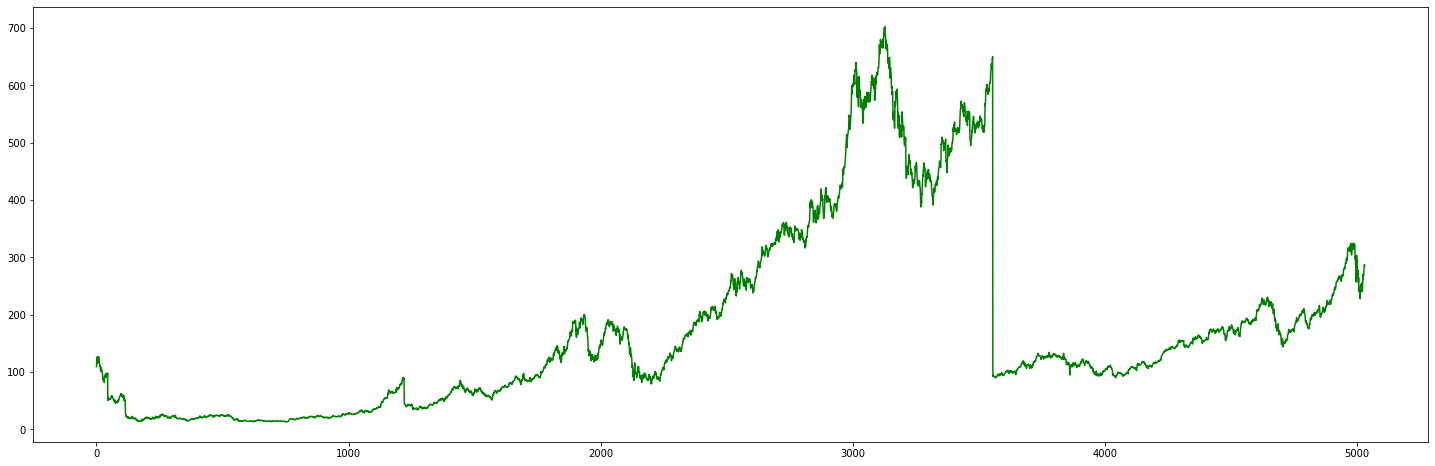

In [11]:
plt.figure(figsize=(25,8))
plt.plot(dataset['1. open'],color='green')

We are trying to predict the trend in last 60days, 
Please find below for the actual trend in last 60 days

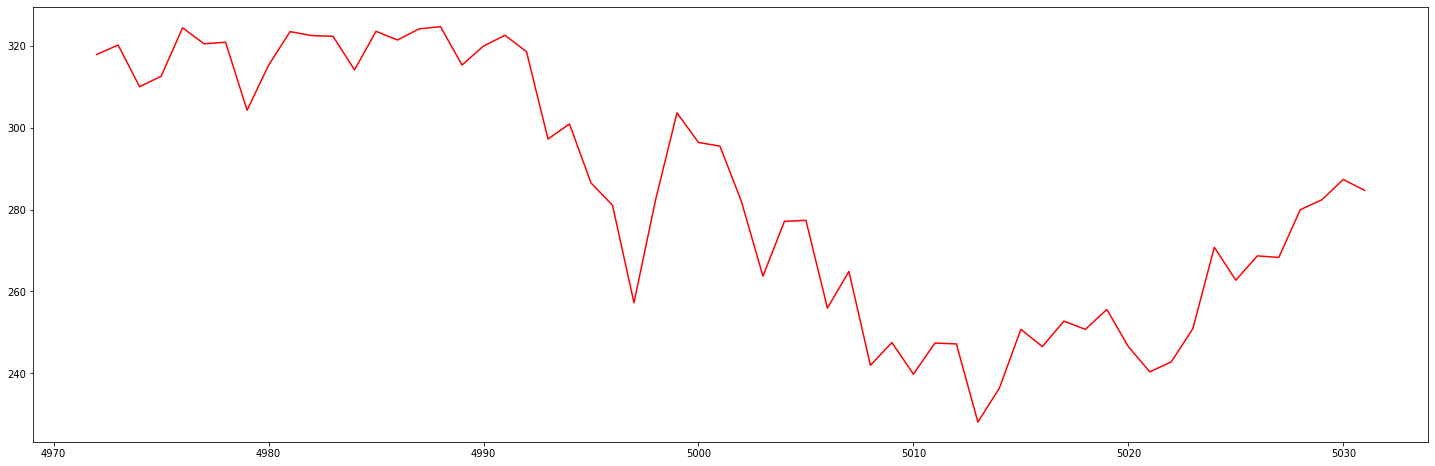

In [12]:
plt.figure(figsize=(25,8))
plt.plot(dataset.iloc[-60:,1:2],color='red')

In [13]:
dataset.head()

,index,1. open,2. high,3. low,4. close,5. volume
0,2000-04-17,109.50,123.94,109.06,123.87,3656800.0
1,2000-04-18,123.50,126.87,119.37,126.87,3490400.0
2,2000-04-19,126.19,130.25,119.75,121.12,4644200.0
3,2000-04-20,123.69,124.75,117.06,118.87,6447500.0
4,2000-04-24,115.00,120.50,114.75,120.50,3960900.0


In [0]:
dataset_train = dataset.iloc[:4971,:]

In [0]:
dataset_test = dataset.iloc[-60:,:]

In [16]:
print(dataset_train.shape,dataset_test.shape)

(4971, 6) (60, 6)


To create a numpy array of train values

In [0]:
train = dataset_train.iloc[:,1:2].values

We have a numpy array of one column

In [18]:
train[:10]

array([[109.5 ],
       [123.5 ],
       [126.19],
       [123.69],
       [115.  ],
       [122.12],
       [126.62],
       [117.19],
       [127.12],
       [124.87]])

## **Feature Scaling**

In [0]:
scale = MinMaxScaler(feature_range=(0,1))

In [0]:
train_scaled = scale.fit_transform(train)

In [21]:
train_scaled[:10]

array([[0.13998724],
       [0.16029416],
       [0.16419599],
       [0.16056975],
       [0.14796496],
       [0.15829248],
       [0.1648197 ],
       [0.15114154],
       [0.16554495],
       [0.16228134]])

## **Creating a training data structure** 

This means that model is going to take 120 stock prices before time T in which RNNs are going to learn and understand some correlations and based on its understanding its going to predict the next output

We can try the above by considering different timestamps

In [0]:
time_len = 120

In [0]:
X_train = []
y_train = []
for i in range(time_len,dataset_train.shape[0]):
    X_train.append(train_scaled[i-time_len:i,0])
    y_train.append(train_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train) #converting to numpy arrays so that they can be accepted in futute to our RNNs

X_train will contain the 120 previous stock prices for current financial day.

y_train will contain will contain stock price for current financial day

In [24]:
print(X_train[0],y_train[0])

[0.13998724 0.16029416 0.16419599 0.16056975 0.14796496 0.15829248
 0.1648197  0.15114154 0.16554495 0.16228134 0.15993154 0.1536799
 0.14813902 0.14188738 0.14374402 0.14116214 0.13209654 0.12819471
 0.1349105  0.13789852 0.13276377 0.13145833 0.13055902 0.12511967
 0.11714195 0.11242784 0.10617621 0.10952685 0.1088016  0.10825041
 0.10716254 0.09973601 0.11714195 0.11650373 0.11456006 0.11695338
 0.12275536 0.12149343 0.12094224 0.11342868 0.11850541 0.11351571
 0.11677932 0.11251487 0.12403179 0.05440805 0.06202315 0.05916568
 0.05730904 0.05916568 0.05848394 0.05812132 0.0577587  0.05677236
 0.05839691 0.05730904 0.05743959 0.05961533 0.06383627 0.06547533
 0.06601201 0.06402483 0.06564939 0.06601201 0.06121087 0.06093528
 0.06000696 0.05739607 0.05413246 0.05345073 0.05368281 0.05698993
 0.05246439 0.05413246 0.05223231 0.04724261 0.05291404 0.05060776
 0.05069479 0.05097038 0.05078182 0.04909924 0.05018711 0.04969395
 0.04915726 0.051333   0.05568449 0.05404543 0.05459662 0.05581

We can see our dataframe with 120 previews of previous stock of the taken financial day

We need to create the new dimensionality of the above mentioned new data structure, because that exactly is accepted by the future recurrent network. [Reference](https://keras.io/layers/recurrent/)

In [0]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

## **Model**

We will build our model below :

Since capturing the trends of a stock price is complex, we need to have high number of neurons

In [0]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 120, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 120, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120, 50)           20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 120, 50)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [0]:
model.compile(optimizer='RMSProp',loss='mean_squared_error')

RMSProp optimizer is preferred for RNNs [Reference](https://keras.io/optimizers/)

In [29]:
model.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
4851/4851 [==============================] - 43s 9ms/step - loss: 0.0074
Epoch 2/20
4851/4851 [==============================] - 41s 9ms/step - loss: 0.0037
Epoch 3/20
4851/4851 [==============================] - 42s 9ms/step - loss: 0.0032
Epoch 4/20
4851/4851 [==============================] - 43s 9ms/step - loss: 0.0025
Epoch 5/20
4851/4851 [==============================] - 43s 9ms/step - loss: 0.0022
Epoch 6/20
4851/4851 [==============================] - 43s 9ms/step - loss: 0.0022
Epoch 7/20
4851/4851 [==============================] - 43s 9ms/step - loss: 0.0020
Epoch 8/20
4851/4851 [==============================] - 43s 9ms/step - loss: 0.0020
Epoch 9/20
4851/4851 [==============================] - 43s 9ms/step - loss: 0.0017
Epoch 10/20
4851/4851 [==============================] - 43s 9ms/step - loss: 0.0016
Epoch 11/20
4851/4851 [==============================] - 43s 9ms/step - loss: 0.0017
Epoch 12/20
4851/4851 [==============================] - 43s 9ms/step - lo

Get the real stock price from testing dataset and convert it to numpy array

## **Creating a test data structure**

In [0]:
real_stock_price = dataset_test.iloc[:,1:2].values

We trained our model in such a way that it can predict the stock price at time T, based on 120 previous stock prices.

Therefore to predict stock prices for last 60days, we will need the 120 previous stock prices of the 60 previous financial days.

In [0]:
dataset_total = pd.concat((dataset_train['1. open'],dataset_test['1. open']),axis=0)

In [0]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-120:].values

In [33]:
inputs.shape

(180,)

As mentioned above we have to change the input shape

In [0]:
inputs = inputs.reshape(-1,1)

In [35]:
inputs.shape

(180, 1)

As done before we are doing feature scaling for the this data too.

In [0]:
inputs = scale.transform(inputs)

Creating X_test datastructure similar to X_train

In [0]:
X_test = []
for i in range(120,120+60):
    X_test.append(inputs[i-120:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

## **Prediction**

In [0]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scale.inverse_transform(predicted_stock_price) #inversing the scaling

## **Visualizing the results**

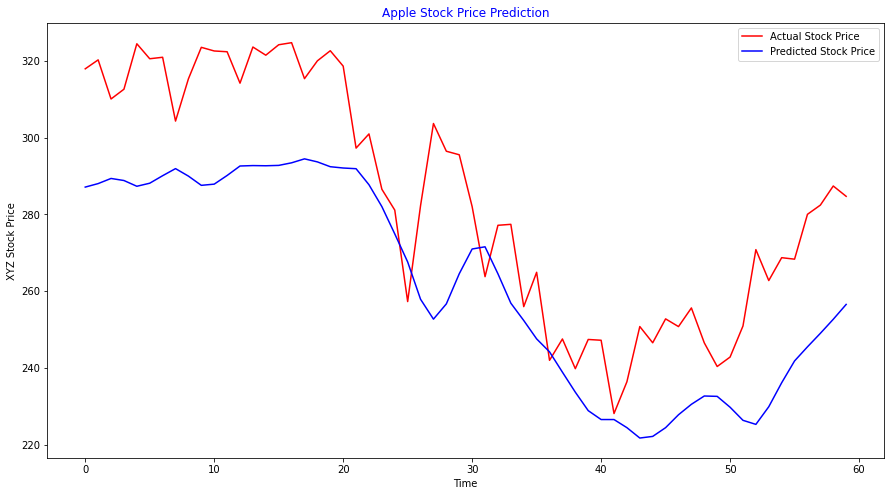

In [39]:
plt.figure(figsize=(15,8))
plt.plot(real_stock_price,color='red',label='Actual Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Apple Stock Price Prediction',color='blue')
plt.xlabel('Time')
plt.ylabel('XYZ Stock Price')
plt.legend()
plt.show()

The RNN we built was a regressor. Indeed, we were dealing with Regression because we were trying to predict a continuous outcome (the Apple Stock Price). For Regression, the way to evaluate the model performance is with a metric called RMSE (Root Mean Squared Error). It is calculated as the root of the mean of the squared differences between the predictions and the real values.

However for our specific Stock Price Prediction problem, evaluating the model with the RMSE does not make much sense, since we are more interested in the directions taken by our predictions, rather than the closeness of their values to the real stock price. We want to check if our predictions follow the same directions as the real stock price and we don’t really care whether our predictions are close the real stock price. The predictions could indeed be close but often taking the opposite direction from the real stock price.

Lets try to see the model for a Bidirectional LSTM

In [0]:
model = Sequential()
model.add(Bidirectional(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [0]:
model.compile(optimizer='RMSProp',loss='mean_squared_error')

RMSProp optimizer is preferred for RNNs [Reference](https://keras.io/optimizers/)

In [42]:
model.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
4851/4851 [==============================] - 79s 16ms/step - loss: 0.0069
Epoch 2/20
4851/4851 [==============================] - 75s 16ms/step - loss: 0.0034
Epoch 3/20
4851/4851 [==============================] - 75s 16ms/step - loss: 0.0024
Epoch 4/20
4851/4851 [==============================] - 75s 15ms/step - loss: 0.0020
Epoch 5/20
4851/4851 [==============================] - 75s 16ms/step - loss: 0.0019
Epoch 6/20
4851/4851 [==============================] - 75s 16ms/step - loss: 0.0018
Epoch 7/20
4851/4851 [==============================] - 76s 16ms/step - loss: 0.0015
Epoch 8/20
4851/4851 [==============================] - 76s 16ms/step - loss: 0.0015
Epoch 9/20
4851/4851 [==============================] - 76s 16ms/step - loss: 0.0014
Epoch 10/20
4851/4851 [==============================] - 76s 16ms/step - loss: 0.0014
Epoch 11/20
4851/4851 [==============================] - 76s 16ms/step - loss: 0.0012
Epoch 12/20
4851/4851 [==============================] - 76s 16

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 120, 100)          20800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 120, 100)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 120, 100)          60400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 120, 100)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 120, 100)          60400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 120, 100)          0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 100)              

Get the real stock price from testing dataset and convert it to numpy array

## **Creating a test data structure**

In [0]:
real_stock_price = dataset_test.iloc[:,1:2].values

We trained our model in such a way that it can predict the stock price at time T, based on 120 previous stock prices.

Therefore to predict stock prices for last 60days, we will need the 120 previous stock prices of the 60 previous financial days.

In [0]:
dataset_total = pd.concat((dataset_train['1. open'],dataset_test['1. open']),axis=0)

In [0]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-120:].values

In [49]:
inputs.shape

(180,)

As mentioned above we have to change the input shape

In [0]:
inputs = inputs.reshape(-1,1)

In [51]:
inputs.shape

(180, 1)

As done before we are doing feature scaling for the this data too.

In [0]:
inputs = scale.transform(inputs)

Creating X_test datastructure similar to X_train

In [0]:
X_test = []
for i in range(120,120+60):
    X_test.append(inputs[i-120:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

## **Prediction**

In [0]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scale.inverse_transform(predicted_stock_price) #inversing the scaling

## **Visualizing the results**

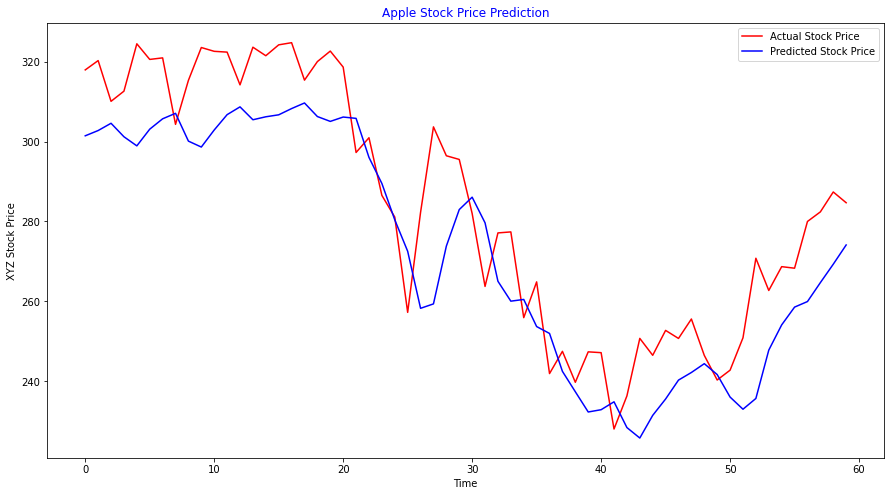

In [55]:
plt.figure(figsize=(15,8))
plt.plot(real_stock_price,color='red',label='Actual Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Apple Stock Price Prediction',color='blue')
plt.xlabel('Time')
plt.ylabel('XYZ Stock Price')
plt.legend()
plt.show()

# **References**

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

https://towardsdatascience.com/introduction-to-rnns-sequence-to-sequence-language-translation-and-attention-fc43ef2cc3fd

https://blog.exxactcorp.com/5-types-lstm-recurrent-neural-network/

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks